In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['HousePrice']=housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

There are no missing values

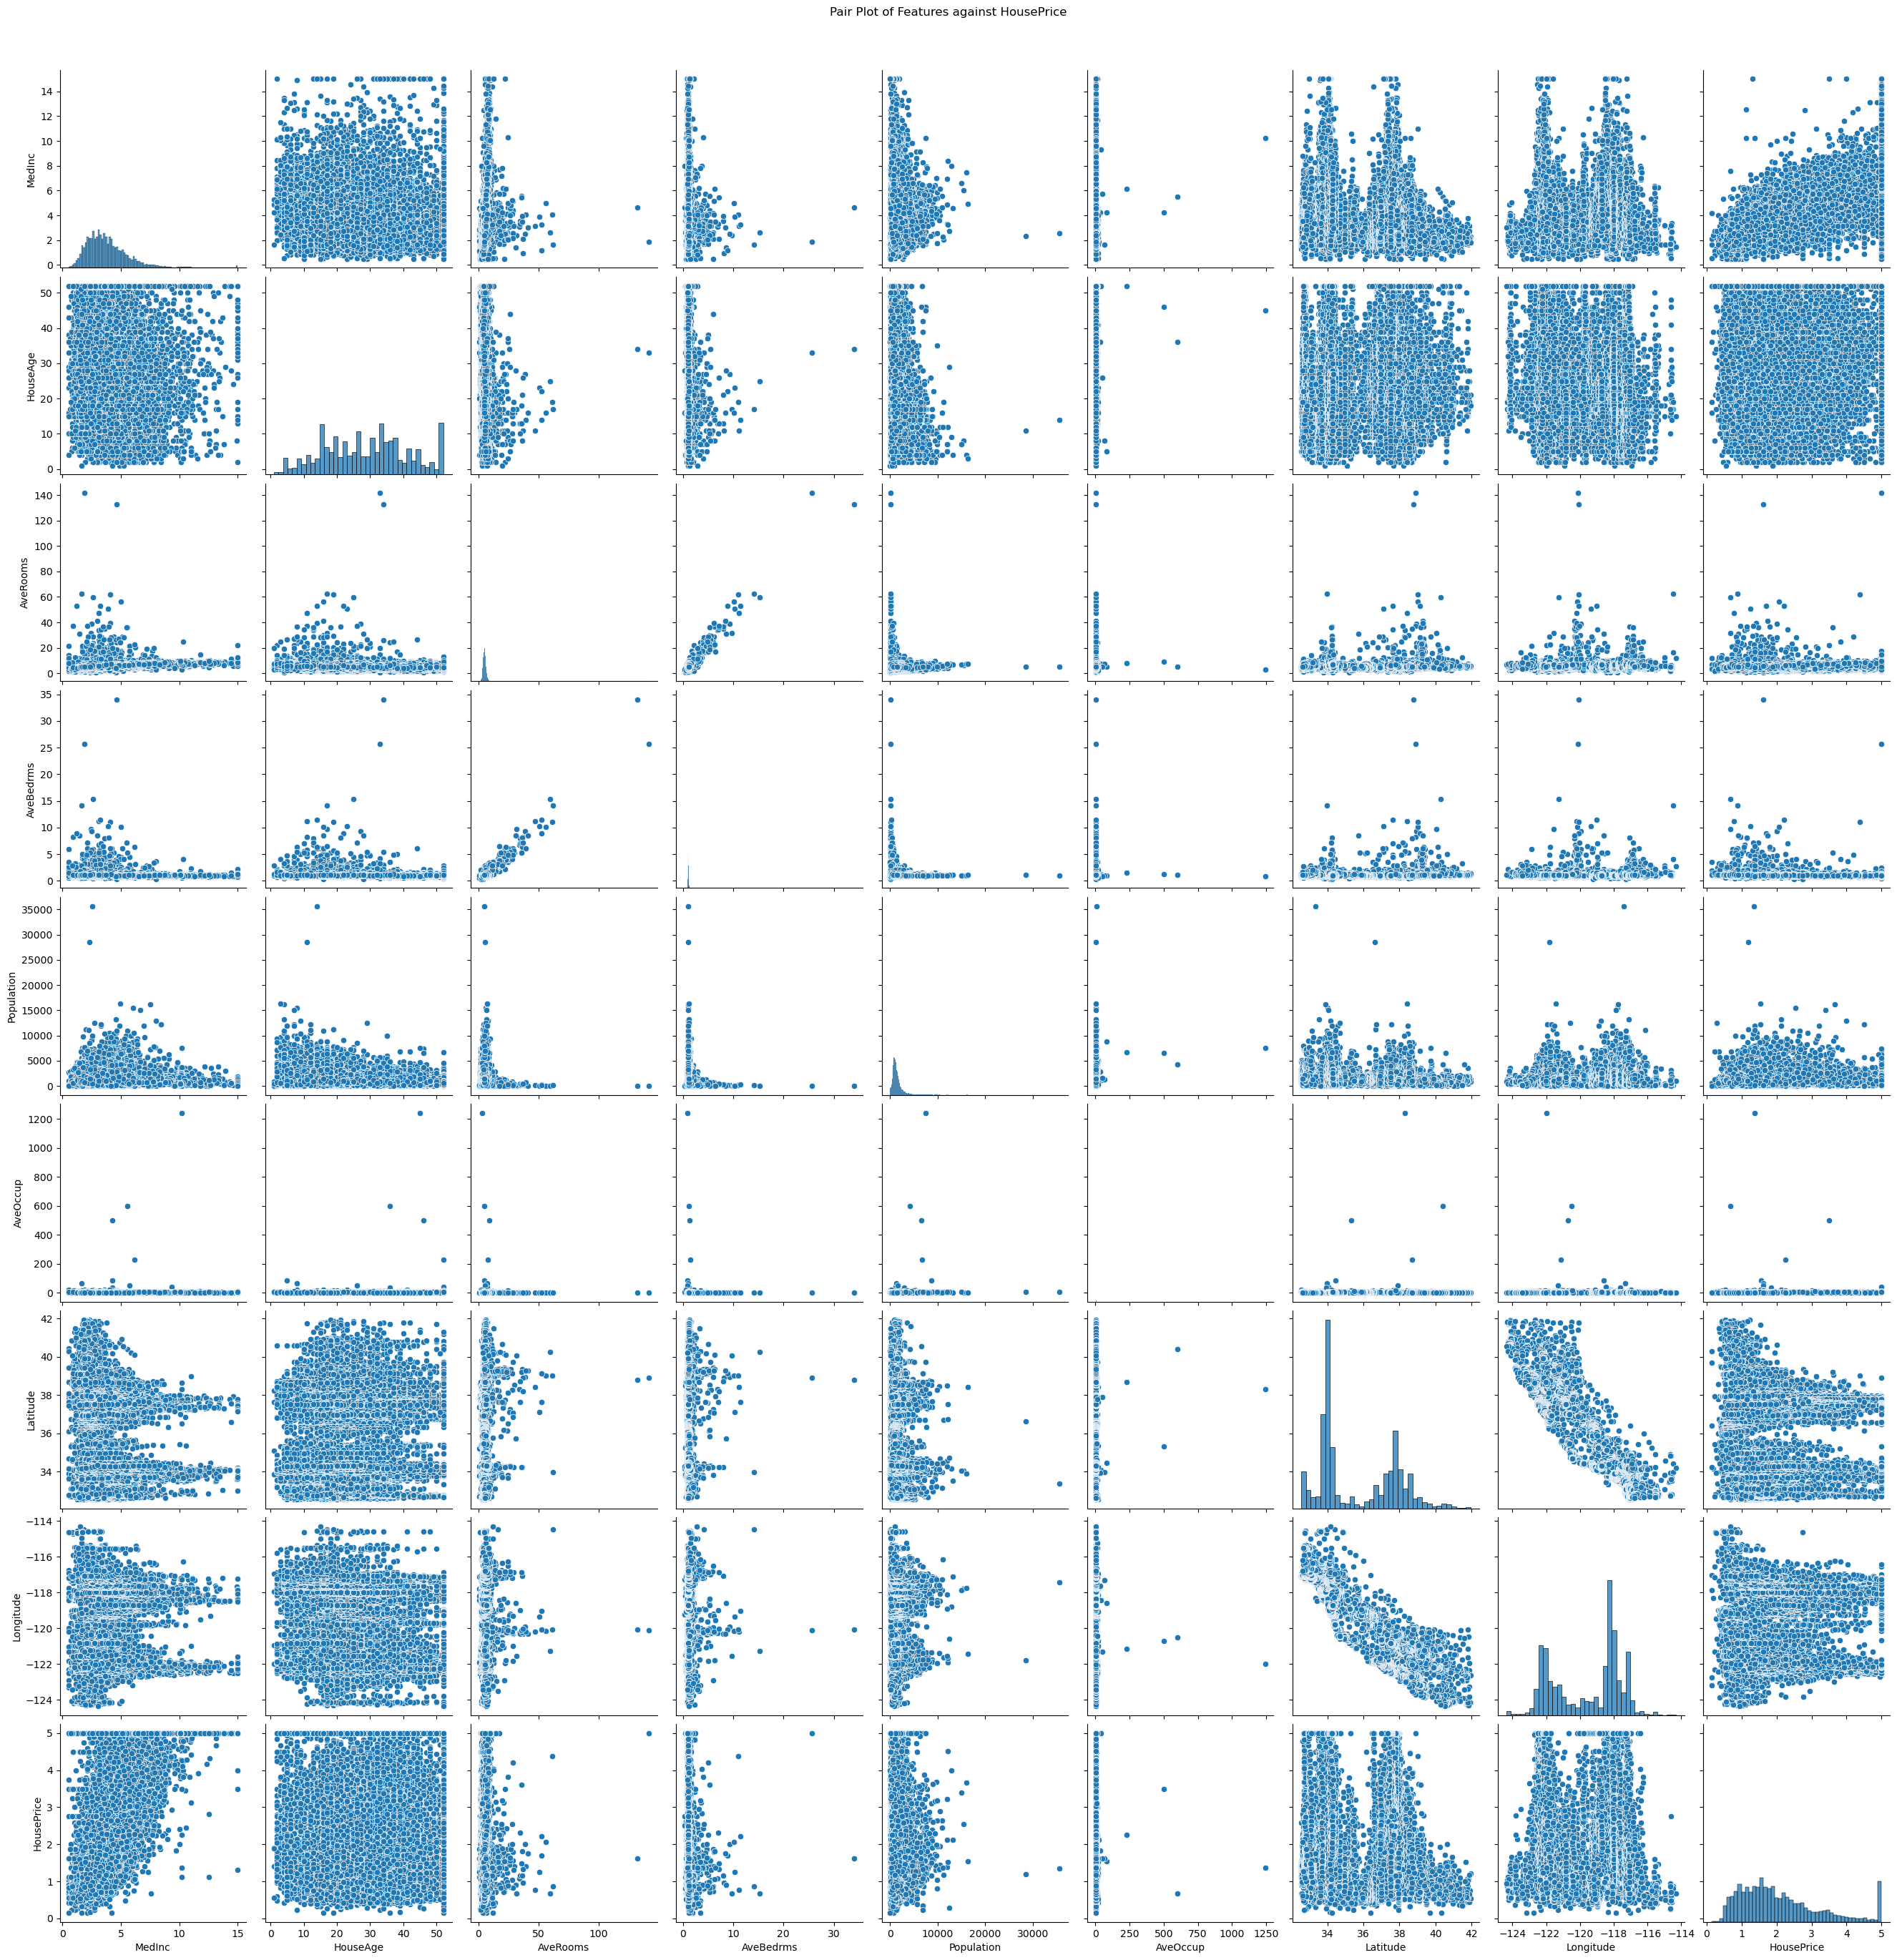

In [11]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair Plot of Features against HousePrice',y=1.02)
plt.show()

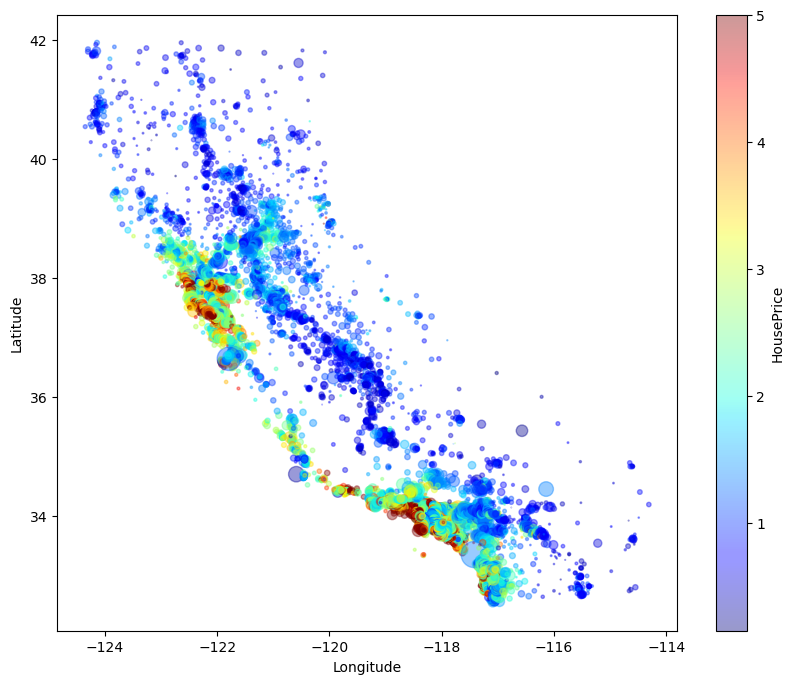

In [12]:
housing_df.plot(
kind="scatter",
x="Longitude",
y="Latitude",
alpha=0.4,
s=housing_df["Population"]/100,
c="HousePrice",
cmap="jet",
colorbar=True,
figsize=(10,8))

plt.show()

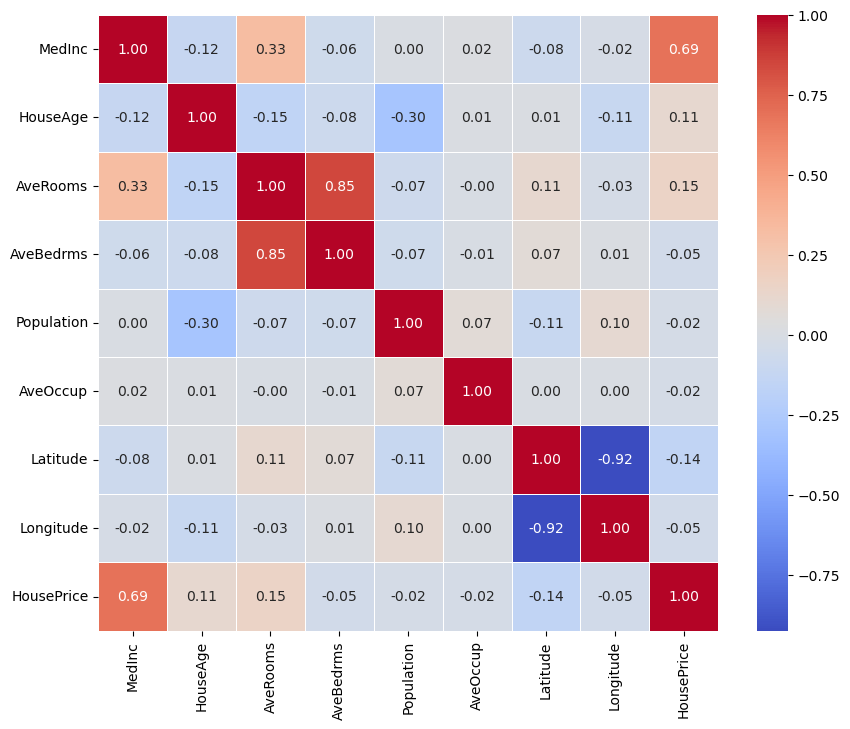

In [16]:
corr=housing_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',linewidth=0.5)
plt.show()

In [20]:
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

Here HousePrice is most affected by Medical Insurance.
Now lets plot scatter plot for Medical Insurance and House Price.

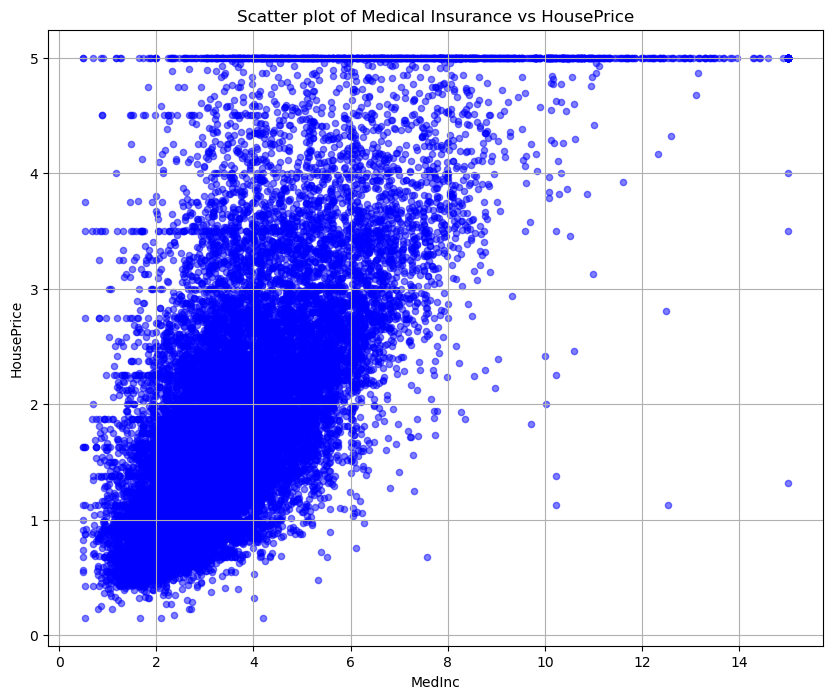

In [25]:
housing_df.plot(
kind='scatter',
x='MedInc',
y='HousePrice',
alpha=0.5,
color='b',
figsize=(10,8),
grid=True)
plt.title('Scatter plot of Medical Insurance vs HousePrice')
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice',axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric,errors='coerce')

vif_data=pd.DataFrame()
vif_data['Feature']= housing_df_vif.columns
vif_data['VIF']=[variance_inflation_factor(housing_df_vif.values,i)for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


Lets remove Latitude and Longitude from Housing dataset to eliminate highly multicollinear features for improving stability.

In [31]:
housing_df= housing_df.drop(['Latitude','Longitude'],axis=1)

Next we convert all the predictors to numerical values and also the target to the numerical value. Creating OLS(Ordinary Least Sqaure) regression model and fits in the data

In [51]:
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert]=housing_df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
housing_df['HousePrice']= pd.to_numeric(housing_df['HousePrice'],errors='coerce')

x=sm.add_constant(housing_df.drop('HousePrice',axis=1))
y=housing_df['HousePrice']

model=sm.OLS(y,x).fit()

Lets now perform residual analysis to validate Linear regression assumption and visualise the distribution of residuals and their relationship with predicted values. We will also discuss the significance of model coefficients to understand how each feature influences the target variable.

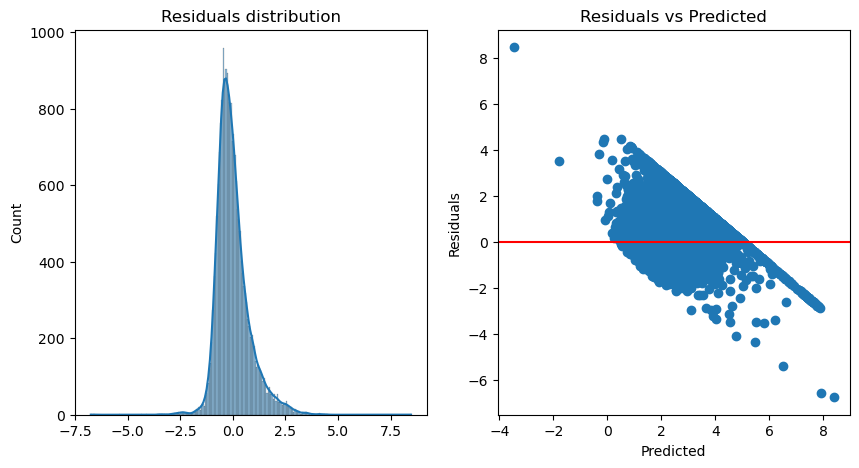

Model Coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [54]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residuals distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color='r',linestyle='-')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

print("Model Coefficients:\n", model.params)

A Random scatter is expected around the zero line but there are points with high positive and negative value which affects the accuracy. Model coeeficients indicates the corellation with house price. Here Average Bedrooms shows the most significant positive influence.

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x)

print('R square Score:', r2_score(y,predictions))
print('MSE:', mean_squared_error(y,predictions))


R square Score: 0.5396977345638283
MSE: 0.6129156196698703


This indicates approximately 54% of the variance in the dependent variable that is 54% of the response data is around the mean. MSE is indicating moderate predictive performance. Now lets use boxplot and visualise predictors and target distribution to identify potential outliers. This boxplot provides ouliers for individual features.

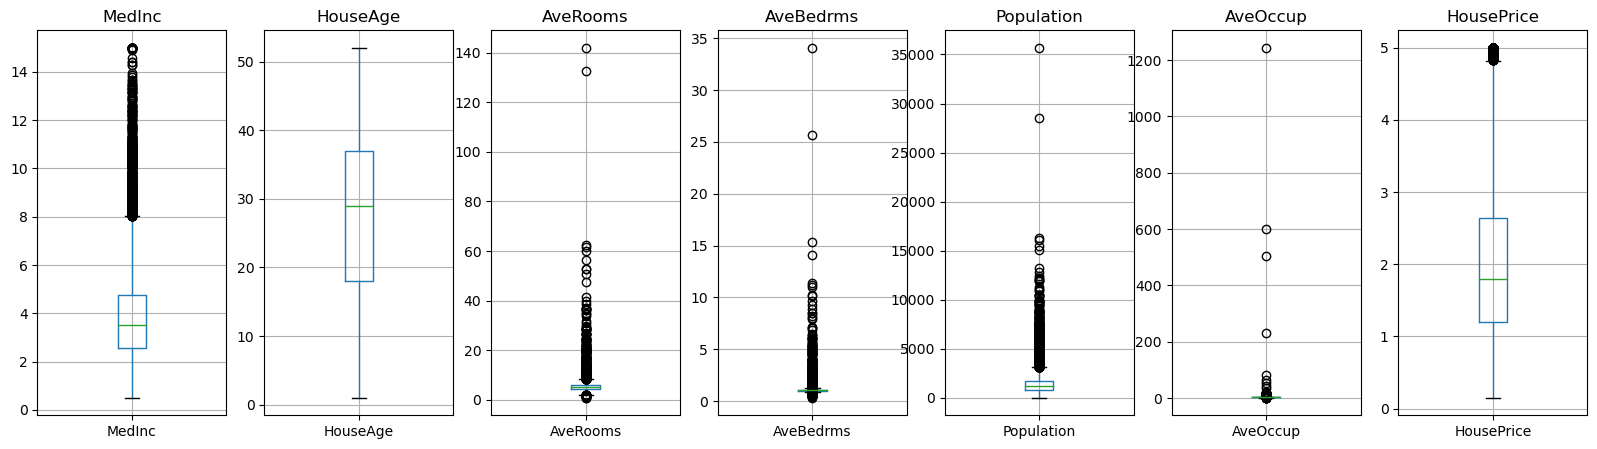

In [59]:
def plot_boxplots(df):
    fig, axes=plt.subplots(1,len(df.columns),figsize=(20,5))
    
    for i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax=axes[i])
        axes[i].set_title(column_name)
        
    plt.show()
        
plot_boxplots(housing_df)

In [70]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        df_no_outliers[column_name]= df_no_outliers[column_name].apply(lambda x: lower_bound if x<lower_bound
                                                                      else upper_bound if x> upper_bound else x)
        return df_no_outliers
housing_df_new = remove_outliers(housing_df)
        

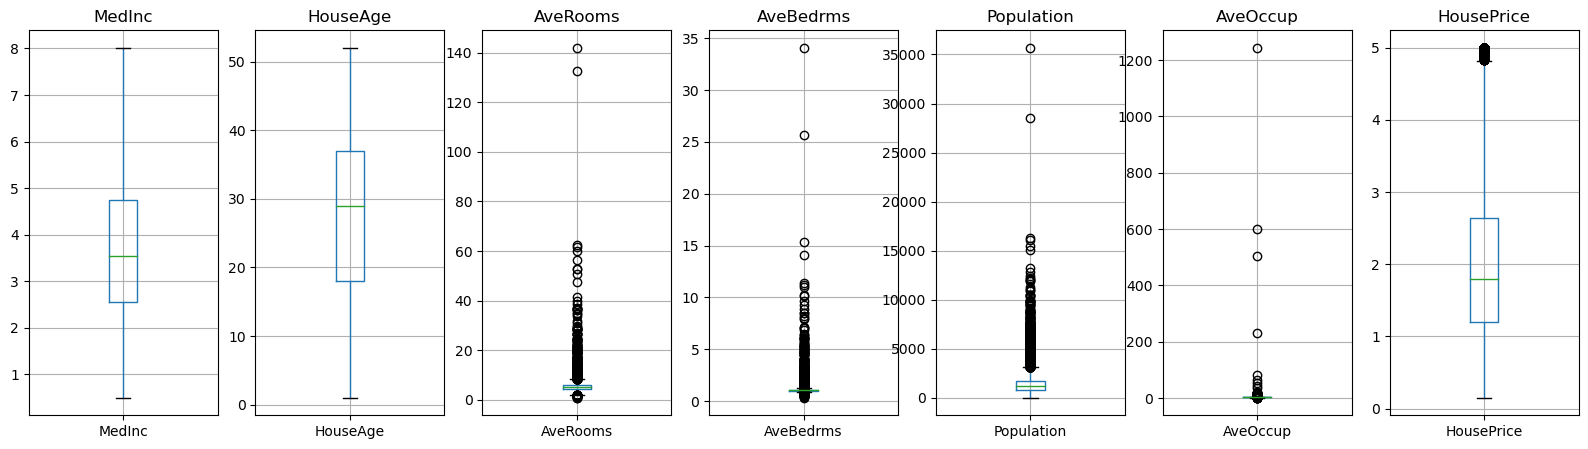

In [71]:
plot_boxplots(housing_df_new)